# PSet 9: Vocabulary Reduction

## Reduction and Key Analysis of tonal music

The `Stream.chordify()` method is a helpful technique for finding all vertical moments in a piece, but not all these moments are things that most music theorists would call "chords".  Many are moments created by passing or neighbor motion or melodic concerns that would not necessarily be classified as part of the harmony of the piece.

Roman numeral labeling is only helpful in cases where the number of chords has already been greatly reduced in a piece.  How do we reduce chords though?  Perhaps by seeing which are not roman numerals.  Hence, there's a chicken-and-egg problem that humans are great at working through, but computers sometimes have a much harder time doing.

Your task in **Groups of 3-4** is, given a 4-part Bach chorale, perform vocabulary reduction and key analysis to produce a score where significant chords (and ONLY significant chords) are labeled with the correct Roman Numeral and key.

You need not get **every** chord right!  You need not work on **every** chorale.  I am asking for amount of worth of work towards a solution, not a complete solution in itself.

You might start by identifying all dissonances as in the video and then removing those that do not make sense.  Or jump back to particular places between the reduction and the original to see if a dissonance is created by a common melodic pattern.  (Review your earlier code on how to find notes or chords at a particular offset in a score).

Your solution need not be fast -- any solution that completes in under two minutes per chorale is fine.

There will likely be three steps to your solution:

1. Identifying non-harmonic tones. You should probably put "PT" (Passing Tone), "NT" (Neighbor Tone), etc. in the lyrics or `.groups` list.  Sometimes consonant notes turn into dissonances (especially in the case of suspensions) and might need to be split.
2. Remove vertical "chords" that are not real chords.
3. Identify keys and key changes that change the roman numeral figures.

These parts may be done in any order and groups might find that doing part 2 before part 1, or part 3 first makes their life easier.

You can decide to work on all parts of the assignment together or, probably better is to split up each part of the assignment and only stitch the parts together afterwards.  To aid in groups doing the latter, I will give below an example of a Chorale where part 1 has already been completed, and the same chorale where part 2 has been completed, as well as my hand-analysis of the final result.

I suggest doing this problem set in your own editors, and only pasting your solution in here afterwards.  This way if you are using an IDE such as PyCharm (which I HUGELY recommend) you will get automatic typing help and error detection.

In [1]:
from music21 import converter, corpus, stream
from music21 import note, chord, pitch, interval
from music21 import key, scale, roman, duration, voiceLeading

If you want to use something else from music21, ask.
I've listed these just to give a list of what we've
talked about, not to restrict creativity.  

However, you may not use anything in the "analysis" module 
nor "tree" modules.  Nor any .rntxt files (already analyzed Chorales) in the corpus.

Students in groups of **three** may use:  `roman.functionalityScore` or the `functionalityScore()` method on RomanNumerals which gives a general sense of which RomanNumeral is more likely. It's a hack I threw together, but it might be helpful.

Students in groups of **four** will need to implement their own version of this method, and should not look at any existing code for this.  (Probably assign one person to write this first). 

All groups may now use `Stream.analyze('key')` to help with their work.

# Exercise 1: The main problem!

*(ignore the exercise numbers...my grading code just requires everything to be numbered!)*

Your system *must* implement the `vocabulary_reduce()` function below so I can see the
results on several chorales.

You *must* use other functions beyond the main function given below.  I do not want to see more than 30 or 40 lines of code per function. Ten to twenty is optimal (That's just good software engineering).   Ensure that your subfunctions are **well documented** and that what each one does, takes in, and returns is explained.  I will not be using any automation software to mark these, just my own eyes.  Help me to read your code.  Testing routines are also key to your reader understanding what is up.

Here is the main function:

In [2]:
from typing import Union

def vocabulary_reduce(sc: stream.Score) -> Union[stream.Score, 
                                                 stream.Part]:
    '''
    Takes in a Score object that represents a four-part Bach chorale
    and returns (Programmer's choice) a new Score or a Part
    that has parts of the Score removed which are not part of the 
    main harmony of the Score and chords (or the notes of the bass part) have
    as their lyric either a roman numeral (`IV6`, etc.) or if the first note
    or after a key change, a key designation with major in uppercase and
    minor in lowercase followed by a colon + space and a roman numeral 
    as in `c#: i6`.
    '''
    return sc


Some Bach chorales that might help you and are a bit easier than bwv66.6:

In [3]:
bwv269 = corpus.parse('bwv269')
# bwv267 = corpus.parse('bwv267')
# bwv180 = corpus.parse('bwv180')
# bwv20 = corpus.parse('bwv20.11')

And here is a modified version of the code given already that will label each chord in bwv269:

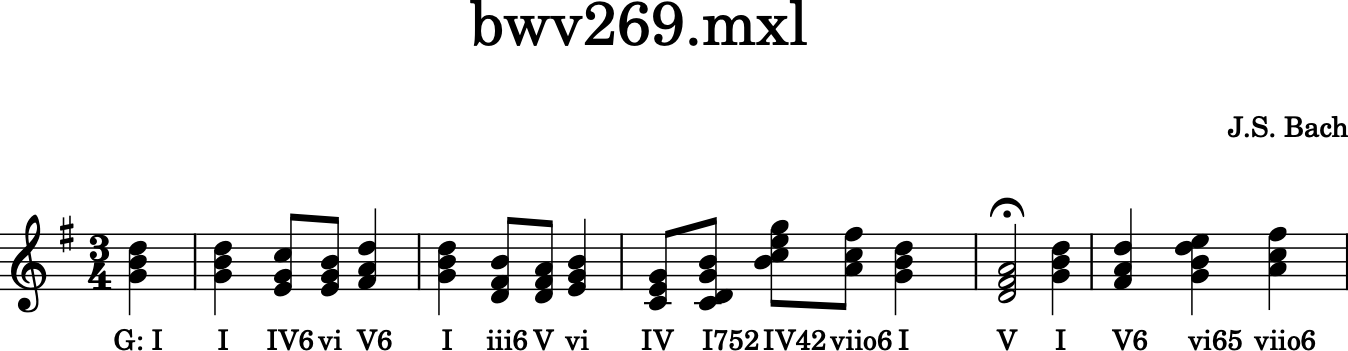

In [4]:
key269 = bwv269.analyze('key')  

chords269 = bwv269.chordify(addPartIdAsGroup=True)

for c in chords269.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    rn = roman.romanNumeralFromChord(c, key269)
    c.lyric = rn.figure

    # removing ties makes the score easier to read.
    # but it might be getting rid of valuable clues
    c.tie = None  
    
#  Add a key designation
first_chord = chords269[chord.Chord][0]
first_chord.lyric = 'G: ' + first_chord.lyric

chords269.measures(0, 5).show()

If you remove a chord, do not leave it empty.  Instead adjust the length and/or of the chord on one side or the other to show the prolonged harmony:

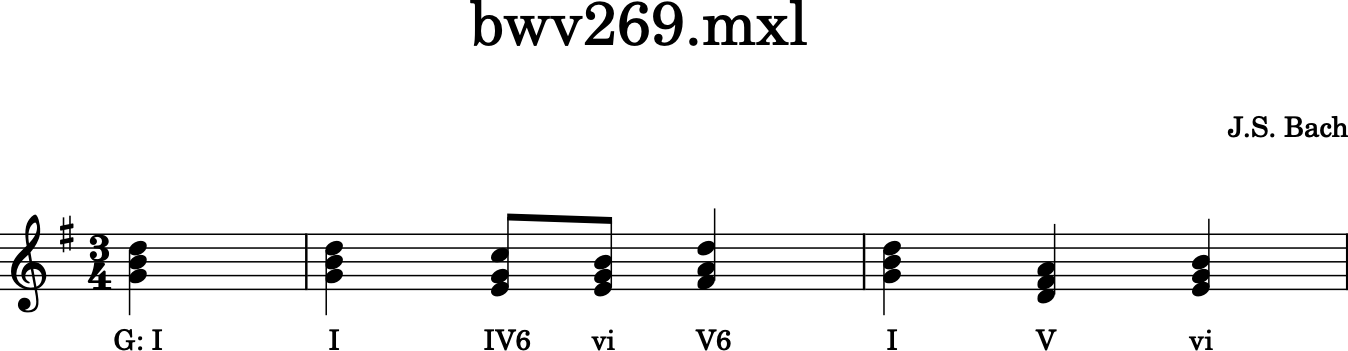

In [5]:
# the iii6 chord in m. 2 might be part of the V chord afterwards: 

m2 = chords269.measure(2)
iii6, v = m2[chord.Chord][1:3]
m2.remove(iii6)
v.setOffsetBySite(m2, 1.0)
v.duration.type = 'quarter'
chords269.measures(0, 2).show()

# Exercise 2: Code Explanation

*(ignore the exercise numbers...my grading code just requires everything to be numbered!)*

Explain below what the overall approach of your code is, what worked well in your approach and what did not.  You can (and probably should) use code examples and samples of music to demonstrate things that worked and things that did not.

In [6]:
# feel free to mix code and markdown cells in your explanation





(Markdown code here)

## How the PSet will be graded

The pset will be graded on six criteria:

1. Success in labeling and/or removing non-harmonic tones.  (You only need to remove them for full points, but additional partial credit will be given for labeled tones)  (15%)
2. Success in removing non-essential chords (and leaving in essential chords)  (20%)
3. Success in labeling chords and keys. (15%)
4. If the whole notebook is run, does adding these lines at a code module at the end produce some coherent output without crashing: (10%)
    ```
    bwvXXX = corpus.parse('bwvXXX')  # where XXX is a random 4-part chorale
    bwvXXX_reduction = vocabulary_reduce(bwvXXX)
    bwvXXX_reduction.show()
    ```
    
    This is ten percent of the grade -- and might sound silly, but in previous
    terms every single group has lost these points! Having software that works
    is extremely important.  (`corpus.chorales.Iterator()` will run through all
    chorales, but some of them have more than four parts!)
5. Overall vocabulary reduction/analysis success on BWV 253, BWV 269 and BWV 267 (15%)
6. Success on random chorales beyond the five given as examples (5%)
7. Code explanation, quality, and documentation (20%)

Scoring about 2/3 of the total points available in each section will definitely be sufficient for an "A" grade.

# Exercise 3: Names and Collaboration

Please put the names of everyone in your group and their contributions below.  (If you collaborated beyond your group, list collaborators also and the nature of collaboration.)  Turn in one copy of the pset (preferably under the name of the person alphabetically first).

`group members and each's main contribution:`


`collaborators:`


# Manually edited chorale

Here is a chorale that has already reached certain stages so that groups that divide the work can have a piece that they can work on part 2 or part 3 without previous parts being done.  This is only one possible solution: there may be some notes that you disagree as being passing tones or passing chords, and you may believe that there are other key changes in the piece.  I myself went back and forth about certain solutions.

Here is the chorale.  No. 1 in the Breitkoph & Härtel 389 Bach Chorales edition:

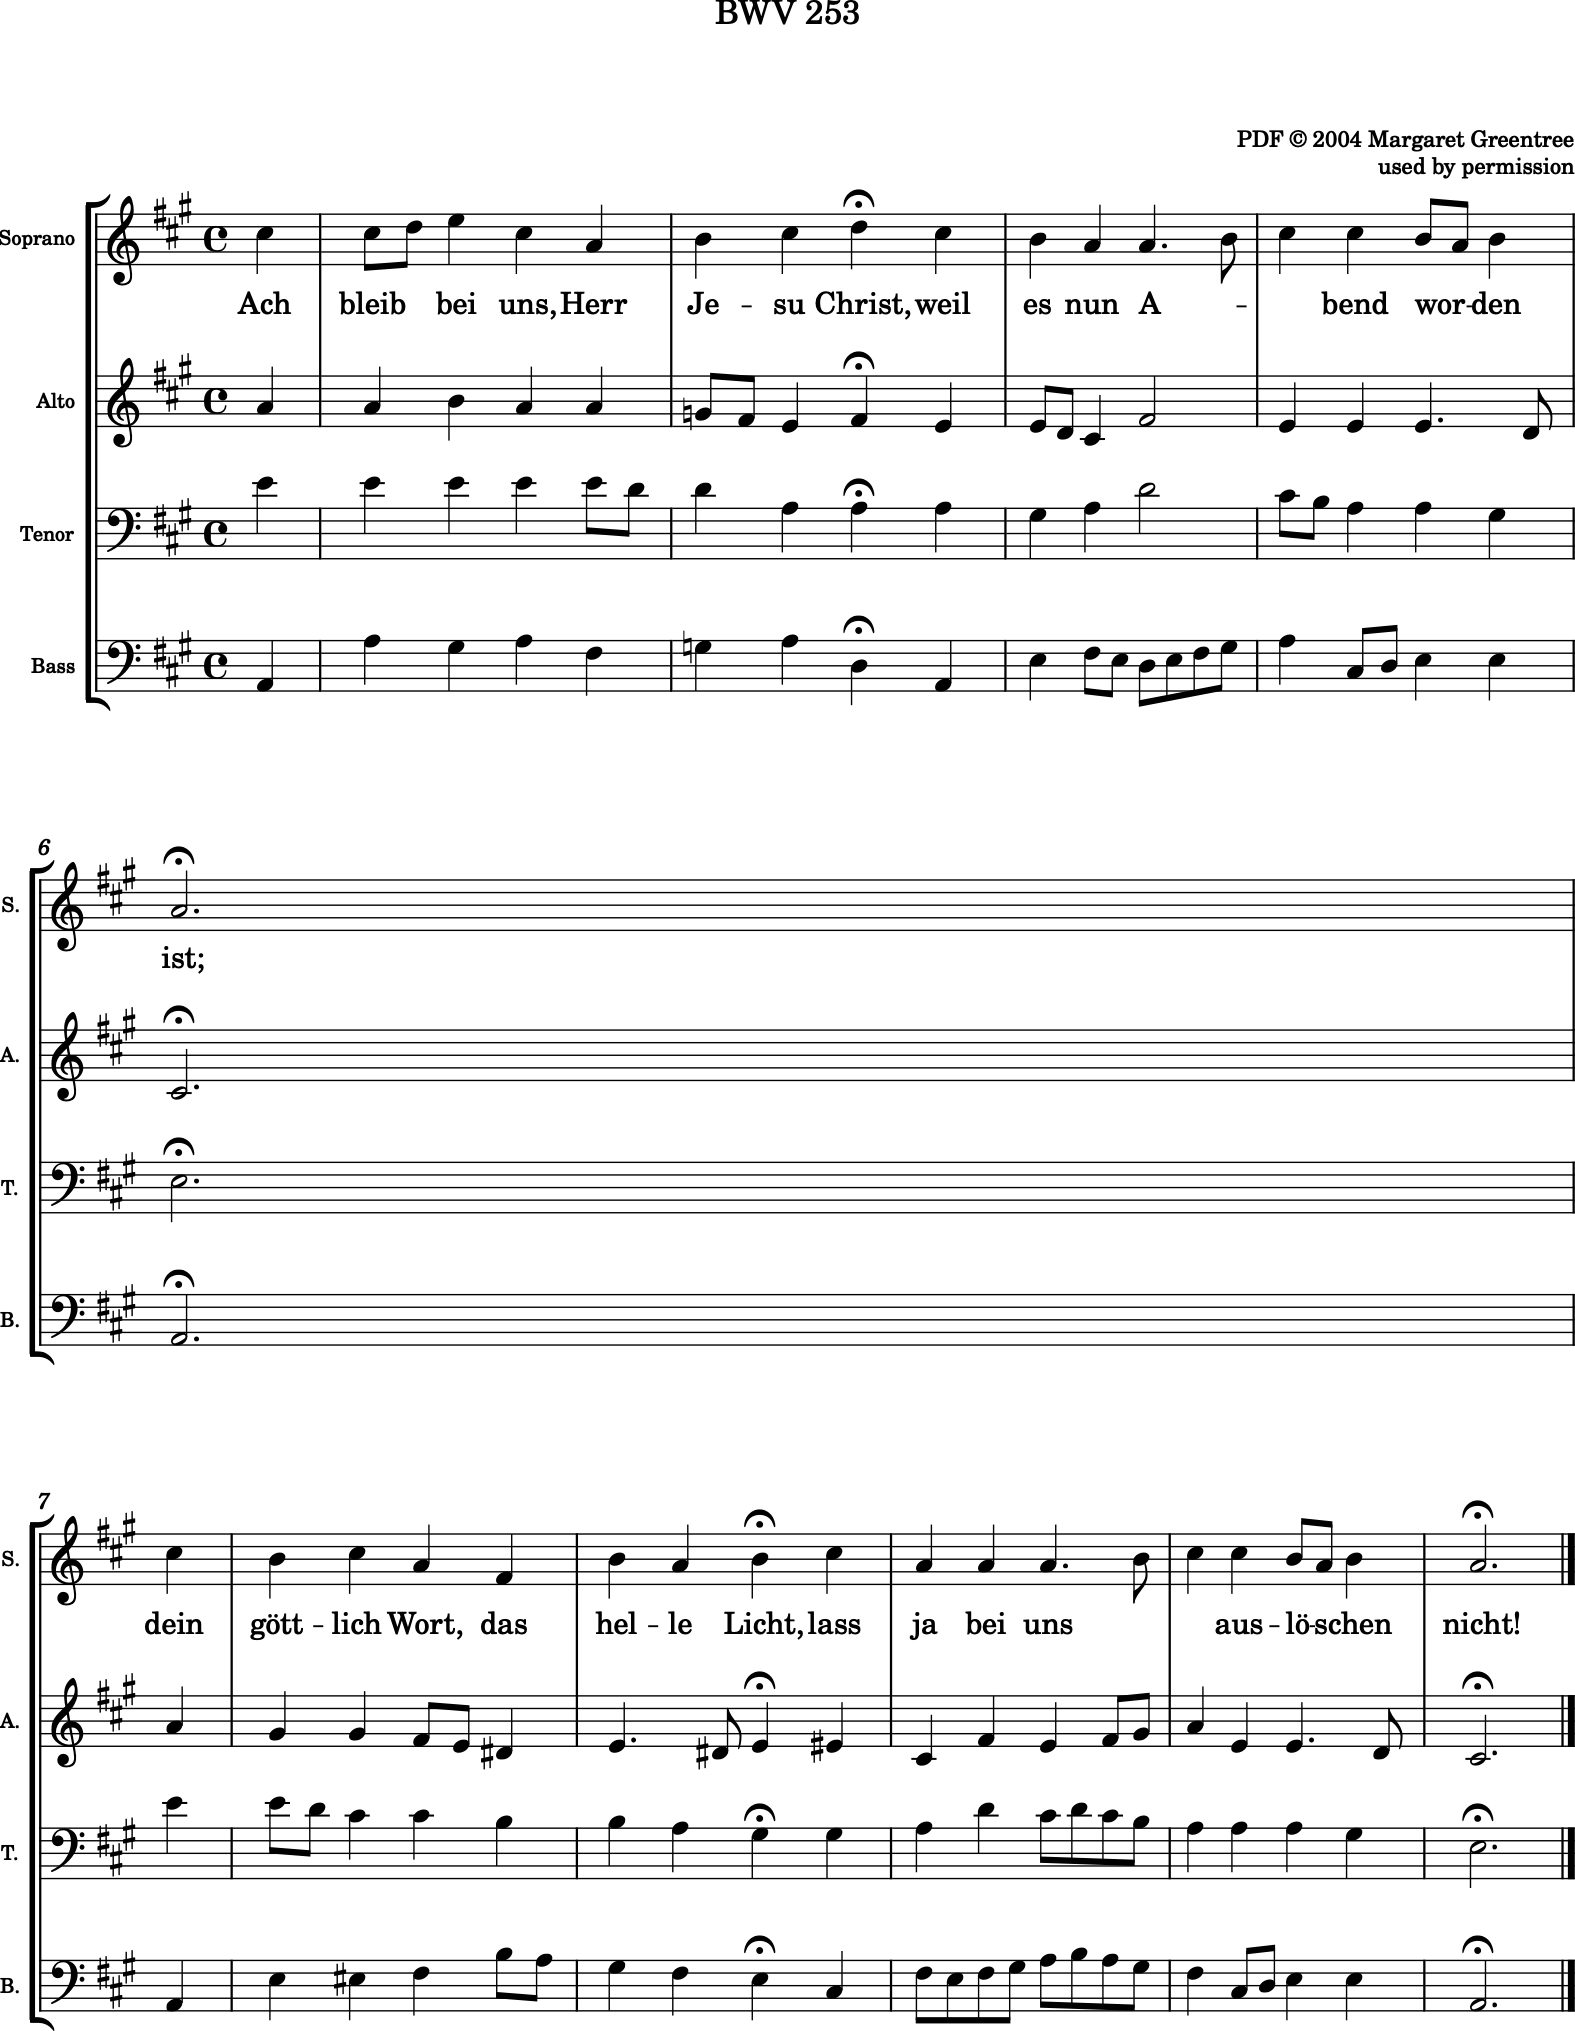

In [7]:
bwv253 = corpus.parse('bwv253')  # Ach bleib bei uns.  Bach Ausgabe 39 no 1.
bwv253.show()

By the way: you might find the "implode()" method on Streams helpful in looking at your scores:

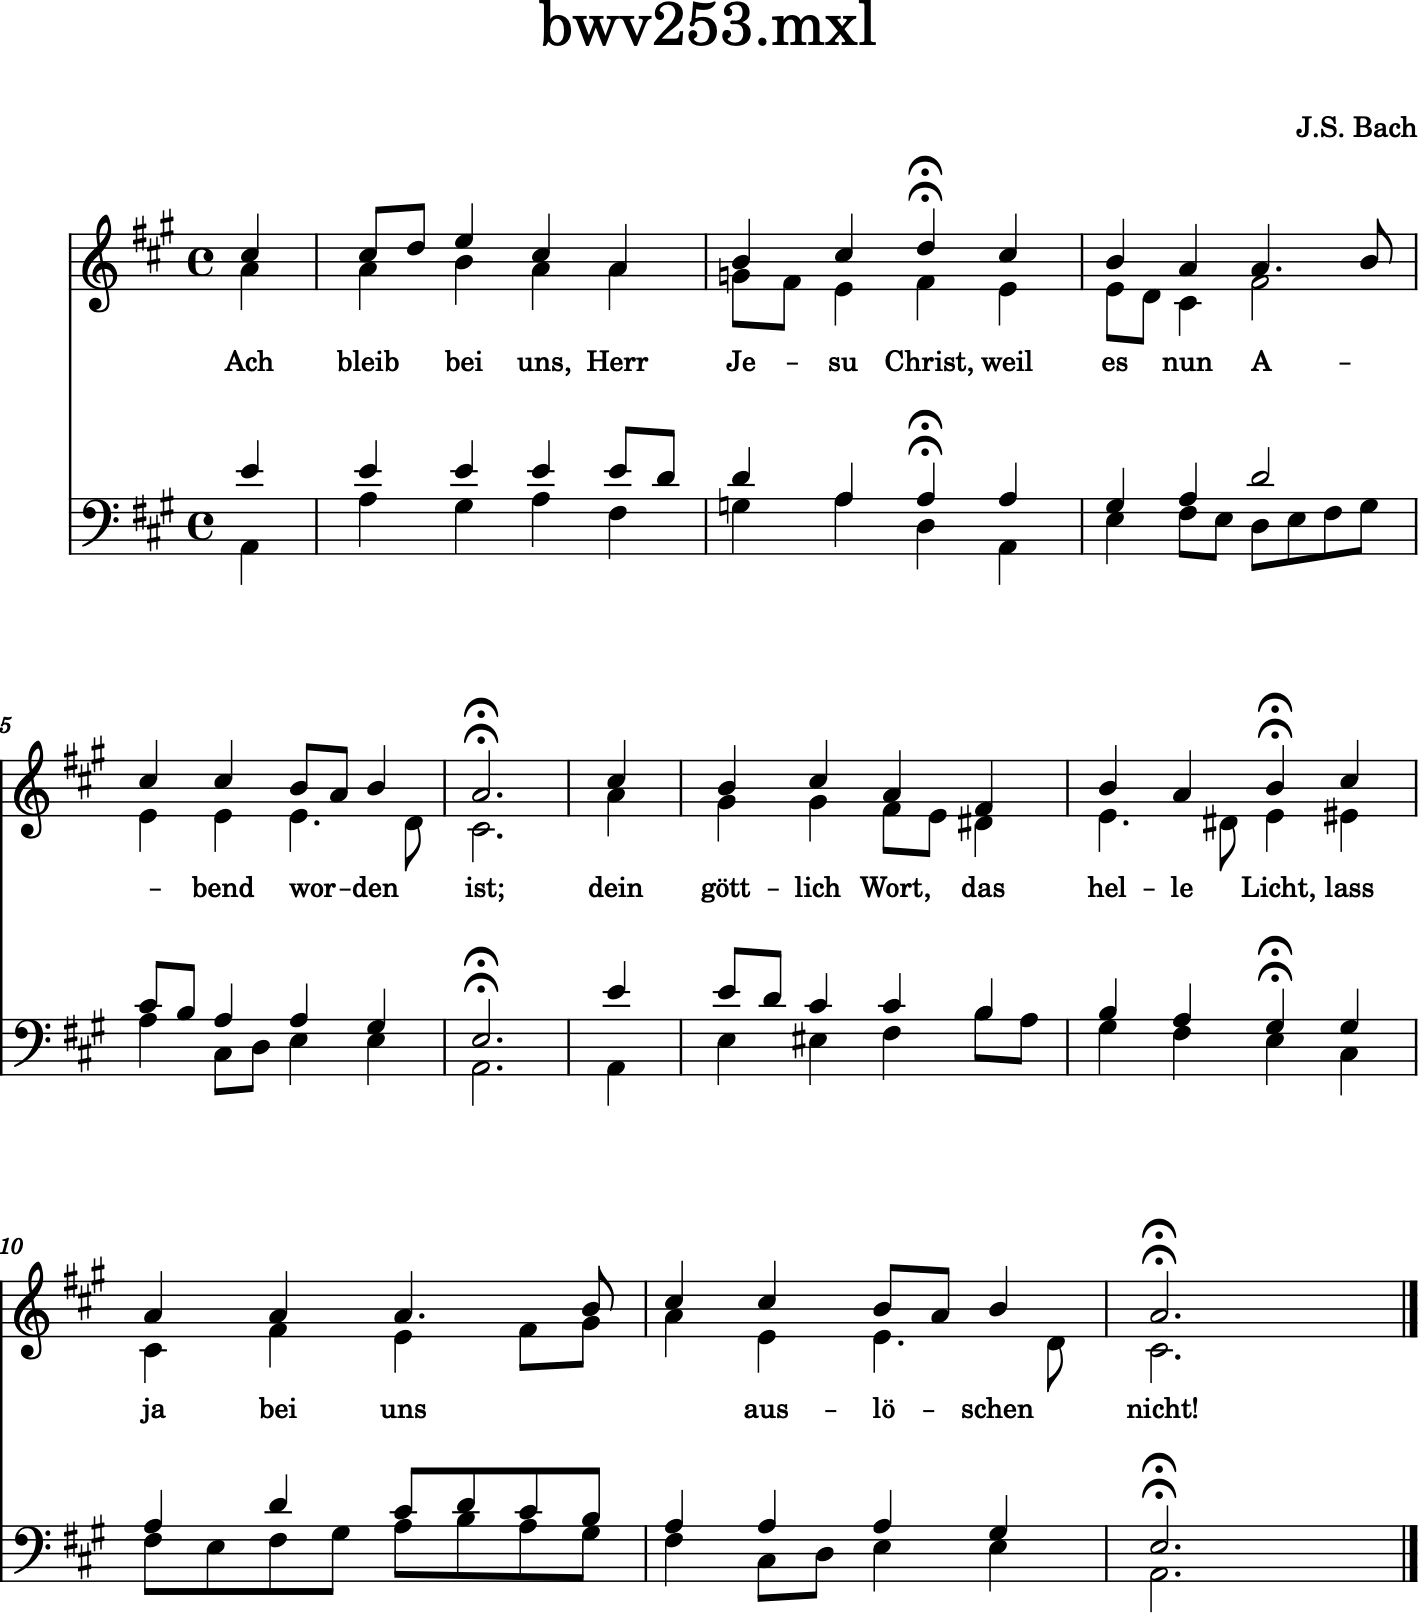

In [8]:
two_staves = bwv253.implode()
two_staves.show()

Here is the chorale after non-harmonic tones have been labeled in lyrics and colored: 

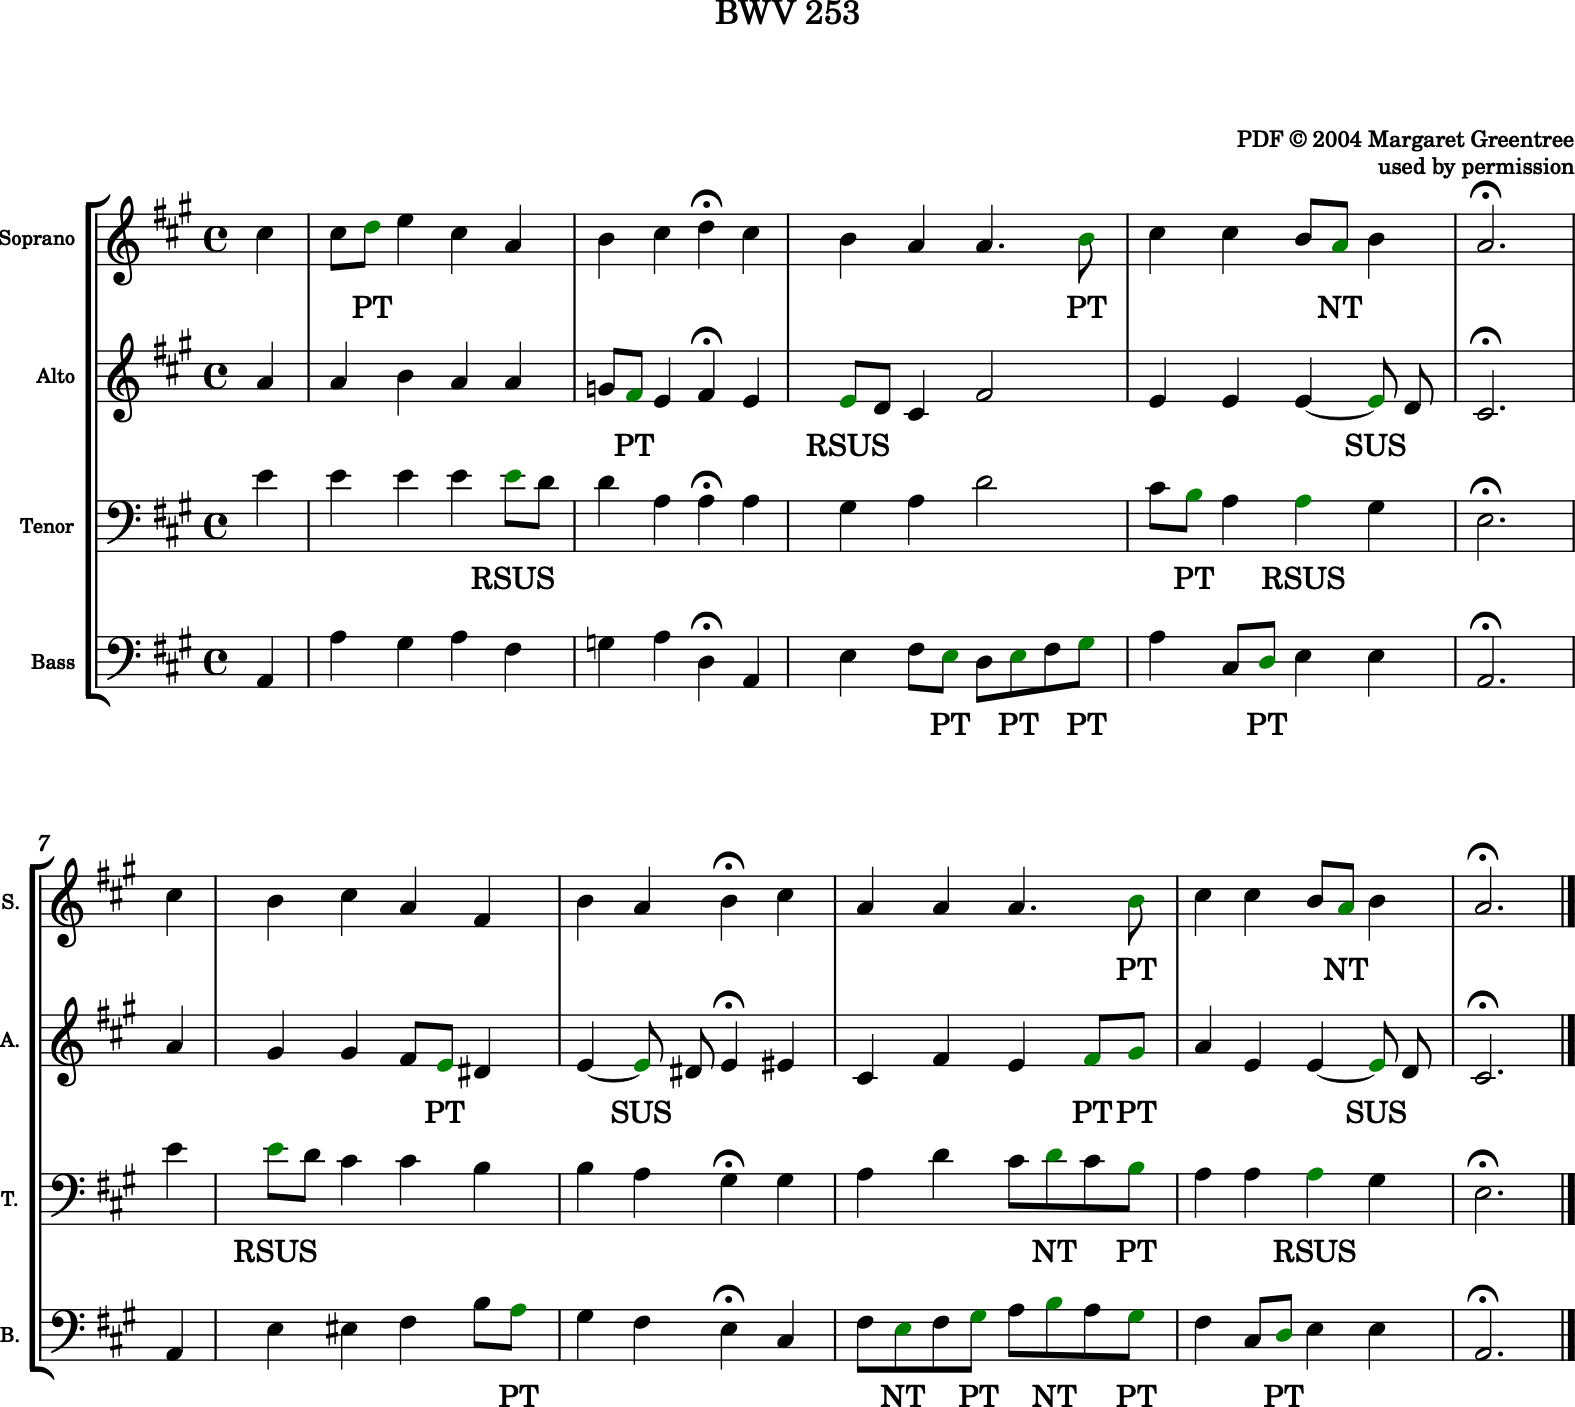

In [9]:
stage1 = converter.parse('https://www.dropbox.com/s/u1t3omdt7oktplz/pset_09_bwv253_1_after_nht_labeled.xml?dl=1', format='musicxml')
for n in stage1.recurse().notes:
    if n.lyric is not None:
        n.groups.append(n.lyric)
stage1.show()

PT = Passing tone.  NT = Neighbor tone.  SUS = Suspension (notes have been split to show where the suspension begins).  RSUS = Restruck suspension.  Passing tones and neighbor tones should have their values added to the previous notes to make them consonant.  Suspensions should have values added to the following note to make them consonant.

Here is the chorale after chordification and removal of non-harmonic sonorities and joining chords that are the same:

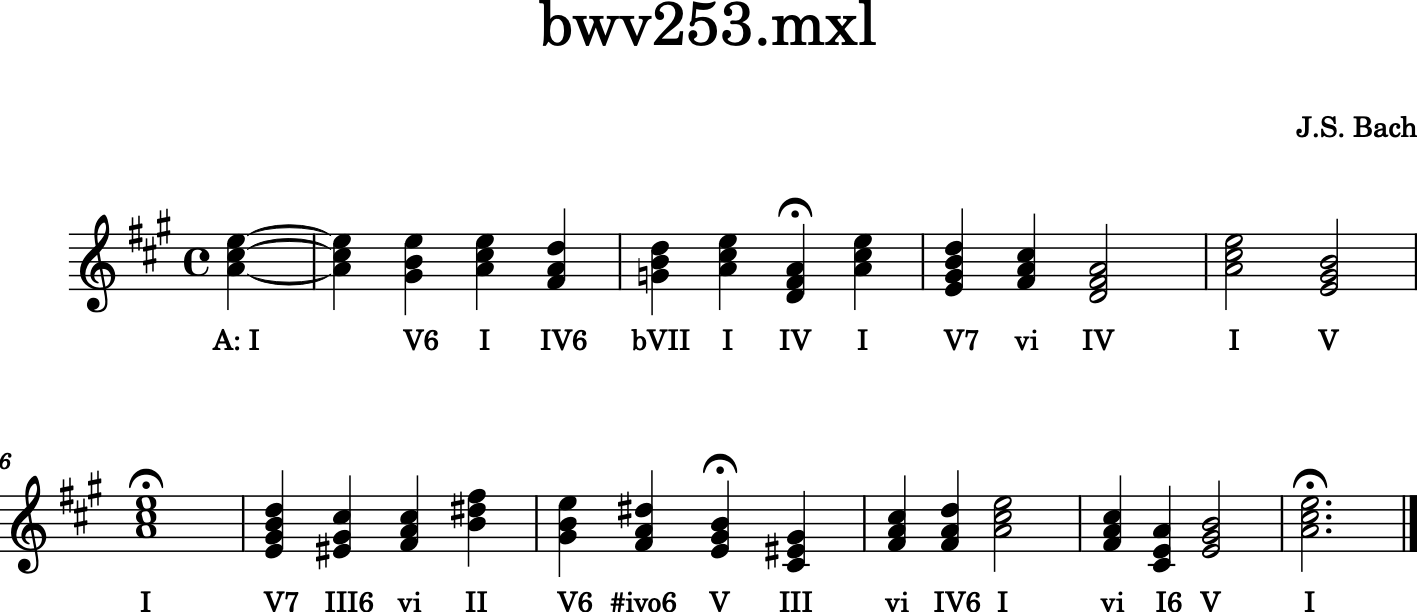

In [10]:
stage2 = converter.parse('https://www.dropbox.com/s/1nnznyyzckekolo/pset_09_bwv253_2_non_chords_removed.xml?dl=1', format='musicxml')
stage2.show()

Finally, here is a chorale as it might be turned in, with two key changes labeled and some chords labeled as seconary dominants (or secondary leading tone chords):

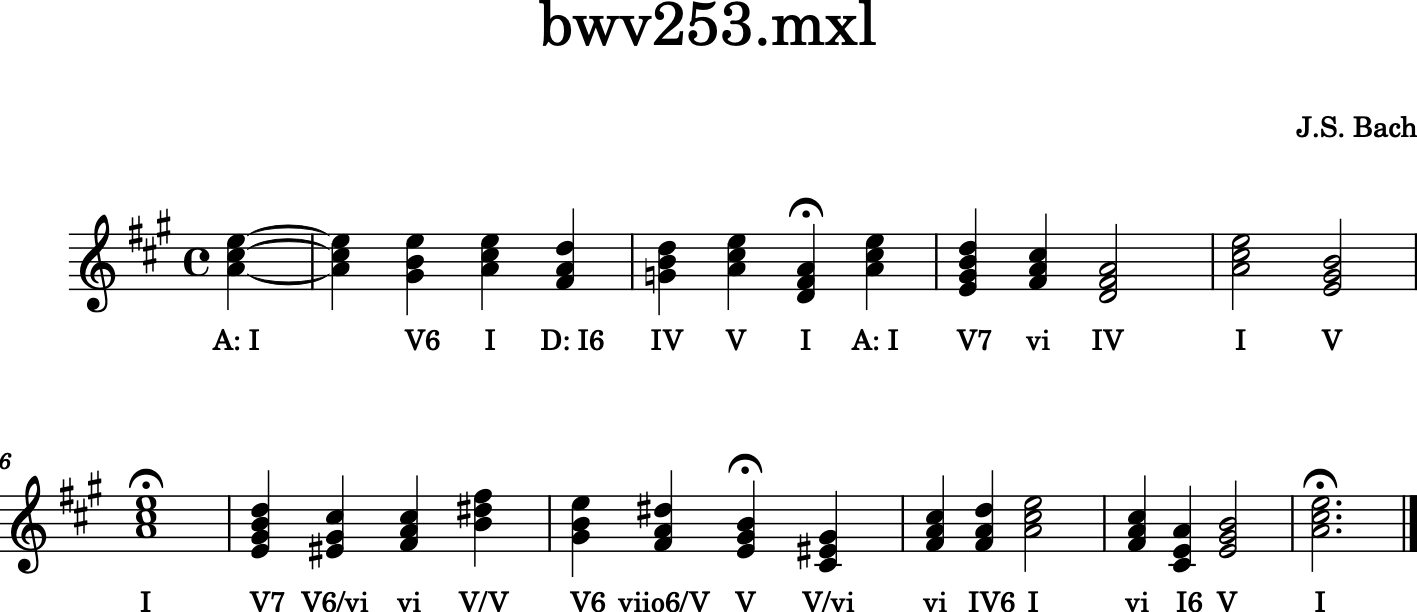

In [11]:
stage3 = converter.parse('https://www.dropbox.com/s/t73alyp30pgg8zs/pset_09_bwv253_3_complete.xml?dl=1', format='musicxml')
stage3.show()

Though secondary dominants (applied chords) are supposed to be part of the 21m.301 curriculum, I understand that not every professor emphasizes them or were able to get to them last spring.  If you are confused by terminology such as "V7/vi" see:

https://music.utk.edu/theorycomp/courses/murphy/documents/SecondaryDominants.pdf

Note that these are examples of acceptable output after each stage.  Your answer might differ and still be great.

In [12]:
# eof